<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# Advanced Programming in Python
   ------

## Table of Contents

     
2. [Pandas](#section2)<br>
     - 2.1. [Importing the Package](#section201)<br>
     - 2.2. [Series](#section202)<br>
          - 2.2.1 [Series Indexing](#section203)<br>
     - 2.3. [DataFrames](#section204)<br>
          - 2.3.1. [Loading Files Into DataFrames](#section205)<br>
          - 2.3.2. [DataFrames Attributes](#section206)<br>
          - 2.3.3. [Selection, Addition and Deletion](#section207)<br>
          - 2.3.4. [Indexing In DataFrames](#section208)<br>
          - 2.3.5. [Merging, Concatenating and Appending](#section212)<br>
          - 2.3.6. [Conditionals In DataFrames](#section209)<br>
          - 2.3.7. [MultiIndex DataFrame](#section210)<br>
          - 2.3.8. [GroupBy](#section211)<br>
          - 2.3.9. [Operations in DataFrame](#section213)<br>
     - 2.4. [Time Series In Pandas](#section214)





__Key Features__<br/>
- NumPy arrays have a __fixed size__ decided at the time of creation. _Changing the size of an ndarray will create a new array and delete the original._
- The elements in a NumPy array are all required to be of the __same data type__, and thus will be the same size in memory.
- NumPy arrays facilitate __advanced mathematical__ and other types of __operations__ on large numbers of data.

### 2. Pandas (PANel Data AnalysiS)

**Pandas** is a fast and efficient __DataFrame object__ for data manipulation. 
- It can read and write data in a variety of formats like csv and Text files, Excel, json and SQL database.<br>
- It provides __high performance DataFrame operations__ for Numerical and Time series data.<br>
- It is highly optimized for performance and most of its critical code in written in C.
- **Pandas** are built on top of **numpy**.

<a id=section201></a>


### 2.1. Importing the package

As we have imported Numpy package, similarly we will import pandas with alias name __pd__.

In [94]:
import pandas as pd

<a id=section202></a>

### 2.2. Series

These are __1D labelled ndarray__ capable of storing __any datatype__(int, float, string).

- The axis labels are called index and they need not to be unique but must be _hashable type_ 
- An object is hashable if it has a hash value which never changes during its lifetime.
- All of Python’s immutable built-in objects are hashable, while no mutable containers (such as lists or dictionaries) are.

Take a look at the below example of Pandas series. <br/>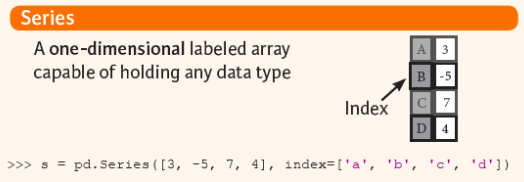

In [95]:
import numpy as np
import pandas as pd

countries = ['India','France','England']                                   # Creating two lists containing name of the country and its capital
capitals = ['New Delhi','Paris','London']                                      
arr = np.array(capitals)                                                   # Making an array with the list capitals
dicts = {'a':10, 'b':20, 'c':30, 'd':40, 'e':50, 'f':60, 'g':70, 'h':80}   # Defining a dictionary

**Creating a series from a list**

In [96]:
pd.Series(data = capitals)                                                 # Creating Pandas Series

0    New Delhi
1        Paris
2       London
dtype: object

__Setting custom labels for our series__

In [97]:
pd.Series(data = capitals, index = countries)                              # Modifying series by adding index

India      New Delhi
France         Paris
England       London
dtype: object

 ** Creating a Series from Numpy array **

In [98]:
pd.Series(arr)                                                 

0    New Delhi
1        Paris
2       London
dtype: object

**Creating a Series from a Dictionary**

In [99]:
pd.Series(dicts)                                                

a    10
b    20
c    30
d    40
e    50
f    60
g    70
h    80
dtype: int64

__Takeaways__<br>
Pandas series can be created using various inputs. 
- Through above examples we learnt how to create pandas series using __list, array and dictionary__.

<a id=section203></a>

### 2.2.1. Series Indexing
Here you will observe how the elements of the series are indexed and how we can access any element using it's index.

In [100]:
my_series = pd.Series(dicts)    

In [101]:
my_series.shape                                                          # This Series has 8 elements

(8,)

In [102]:
my_series

a    10
b    20
c    30
d    40
e    50
f    60
g    70
h    80
dtype: int64

** Accessing a single element using its index **

In [103]:
my_series[0]                                                   # Series indexing starts with 0

10

In [104]:
my_series[:3]                                                  # Accessing the first 3 elements in series

a    10
b    20
c    30
dtype: int64

** Accessing a group of elements using index **

In [105]:
my_series[3:7]                                                 # Accessing all the elements from 3rd to 7th index

d    40
e    50
f    60
g    70
dtype: int64

In [106]:
my_series['a']                                                 # Accessing the data using labels

10

In [107]:
my_series[['a','b','c']]                                       # Accessing multiple elements in a series using labels

a    10
b    20
c    30
dtype: int64

In [108]:
my_series['a':'c']

a    10
b    20
c    30
dtype: int64

In [109]:
my_series

a    10
b    20
c    30
d    40
e    50
f    60
g    70
h    80
dtype: int64

In [110]:
my_series + my_series                                          # Performing element wise mathematical operations on series

a     20
b     40
c     60
d     80
e    100
f    120
g    140
h    160
dtype: int64

In [111]:
dicts1 = {1:10, 2:20, 3:30}   # Defining a dictionary
s1 = pd.Series(dicts1)
s1[2]

20

__Takeaways__<br>
As we have accessed one and multiple elements in Numpy arrays, we can do it here also in a similar fashion using __index or labels__.<br/> In the last example we saw that _elementwise mathematical operations_ can be performed on series.

<a id=section204></a>

### 2.3. DataFrames

DataFrames are __2D data structures__ having data aligned in tabular format.

- Data is aligned in rows (also called index) and columns and can store __any datatypes__ like int, string, float, boolean.

- They are highly _flexible_ and offer a lot of mathematical functions.

Shown below is a simple example to make stuffs clearer.<br/>
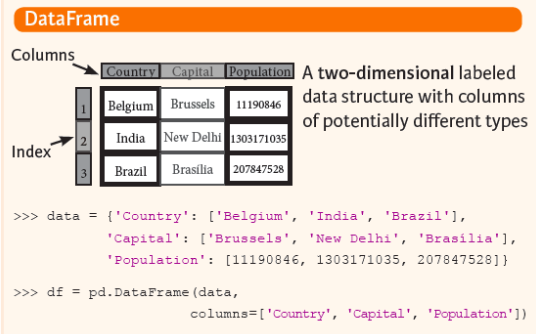

In [112]:
df = pd.DataFrame()                                          # Creating an Empty DataFrame
print(df)

Empty DataFrame
Columns: []
Index: []


**Creating a DataFrame from a List**

In [113]:
fruits = ['Apple','Banana','Coconut','Dates']
fruits_df = pd.DataFrame(fruits, columns=['Fruit'])         # columns is used to set the column name
fruits_df

,Fruit
0,Apple
1,Banana
2,Coconut
3,Dates


**Creating a DataFrame from Nested Lists**

In [114]:
people = [['Rick',60, 'O+'], ['Morty', 10, 'O+'], ['Summer', 45,'A-'], ['Beth',18,'B+']]
people_df = pd.DataFrame(people, columns=['Name','Age', 'Blood Group'])
people_df

,Name,Age,Blood Group
0,Rick,60,O+
1,Morty,10,O+
2,Summer,45,A-
3,Beth,18,B+


**Creating a DataFrame from a Dictionary**

In [115]:
#import pandas as pd
people = {'Name':['Rick', 'Morty', 'Summer', 'Beth'], 'Age':[60,10,45,18], 'Blood Group':['O+','O+','A-','B+']}
people_df = pd.DataFrame(people)       
people_df

,Name,Age,Blood Group
0,Rick,60,O+
1,Morty,10,O+
2,Summer,45,A-
3,Beth,18,B+


You can observe that the dictionary keys have automatically become the column names<br> 

__Takeaways__<br>
From the above examples you got familiar with creating dataframes using various inputs like<br/>
- __Lists__
- __nested lists__
- __dicitionary__<br/>
Also note that pandas dataframes are __mutable__ and potentially __hetrogenous tabular data structure__.

<a id=section205></a>

### 2.3.1. Loading files into DataFrame

DataFrames can load data from many types of files like csv, json, excel sheets, text, etc. Lets learn how to do this one by one, first by using:

- **Comma Separated Values or CSV**

In [116]:
import pandas as pd

In [117]:
#csv_df = pd.read_csv('C:/user-name/Desktop/supermarkets.csv')                               # read_csv is used to read csv file
csv_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/supermarkets.csv')                               # read_csv is used to read csv file
csv_df

,ID,Address,City,State,Country,Name,Employees
0,1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
1,2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
2,3,332 Hill St,San Francisco,California 94114,USA,Super River,25
3,4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
4,5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12
5,6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


- **JSON**

In [118]:
json_df = pd.read_json('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/supermarkets.json')                             # read_json is used to read json file
json_df

,Address,City,Country,Employees,ID,Name,State
0,3666 21st St,San Francisco,USA,8,1,Madeira,CA 94114
1,735 Dolores St,San Francisco,USA,15,2,Bready Shop,CA 94119
2,332 Hill St,San Francisco,USA,25,3,Super River,California 94114
3,3995 23rd St,San Francisco,USA,10,4,Ben's Shop,CA 94114
4,1056 Sanchez St,San Francisco,USA,12,5,Sanchez,California
5,551 Alvarado St,San Francisco,USA,20,6,Richvalley,CA 94114


- **Excel Sheets**<br>
Here we use an additional parameter __sheet name__

In [119]:
import pandas as pd
excel_df = pd.read_excel('https://github.com/insaid2018/Term-1/blob/master/Data/Casestudy/supermarkets.xlsx?raw=true', sheet_name=0)              # read_excel is used to read excel file
excel_df

,ID,Address,City,State,Country,Supermarket Name,Number of Employees
0,1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
1,2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
2,3,332 Hill St,San Francisco,California 94114,USA,Super River,25
3,4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
4,5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12
5,6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


- **Data Structure separated by semi-colon ;**

In [120]:
txt_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/supermarkets-semi-colons.txt', sep=';')            # sep is used to separate the dataset
txt_df               

,ID,Address,City,State,Country,Name,Employees
0,1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
1,2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
2,3,332 Hill St,San Francisco,California 94114,USA,Super River,25
3,4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
4,5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12
5,6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


- **CSV file from the web**

In [121]:
web_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/supermarkets.csv')            # write the url of the csv file within ''.
web_df

,ID,Address,City,State,Country,Name,Employees
0,1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
1,2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
2,3,332 Hill St,San Francisco,California 94114,USA,Super River,25
3,4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
4,5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12
5,6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


__Takeaways__<br>
We have seen how to load data from various types of files.
- for __csv_ file use __read_csv,
- for __json__ file use __read_json__
- for excel files use read_excel__ funnctions.<br/>
Also we made use of the __sep__ argument to __segment__ the datasheet.

<a id=section206></a>

### 2.3.2. Attributes of a DataFrame
After loading your DataFrame you may be interested to know the __columns, shape, datatypes__.<br/> 
There are many functions in pandas to check all the different attributes of a DataFrame

In [122]:
import pandas as pd
pd.read_csv('D:\\etc\\some.csv',sep=';')

,ID,Address,City,State,Country,Name,Employees
0,1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
1,2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
2,3,332 Hill St,San Francisco,California 94114,USA,Super River,25
3,4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10


**Checking the number of rows and columns**

In [123]:
people_df

,Name,Age,Blood Group
0,Rick,60,O+
1,Morty,10,O+
2,Summer,45,A-
3,Beth,18,B+


In [124]:
people_df.shape                                                           # shape function is used to know the dimensions

(4, 3)

**Checking the datatypes of elements in each column**

In [125]:
print(people_df)

     Name  Age Blood Group
0    Rick   60          O+
1   Morty   10          O+
2  Summer   45          A-
3    Beth   18          B+


In [126]:
print(people_df.dtypes)                                                   # dtypes function for information about layout 

Name           object
Age             int64
Blood Group    object
dtype: object


** Checking the column names, number of records, datatype of records**

In [127]:
people_df.info()                                                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
Name           4 non-null object
Age            4 non-null int64
Blood Group    4 non-null object
dtypes: int64(1), object(2)
memory usage: 176.0+ bytes


** Checking the number of records of each column **

In [128]:
people_df.count()                                       

Name           4
Age            4
Blood Group    4
dtype: int64

** Checking the index of the dataframe **

In [129]:
people_df.index                                         

RangeIndex(start=0, stop=4, step=1)

**Checking the list of all columns **

In [130]:
people_df.columns                                       

Index(['Name', 'Age', 'Blood Group'], dtype='object')

** Create a new df with Name set as Index **

In [131]:
people_df

,Name,Age,Blood Group
0,Rick,60,O+
1,Morty,10,O+
2,Summer,45,A-
3,Beth,18,B+


In [132]:
new_people_df = people_df.set_index('Name')                
new_people_df

,Age,Blood Group
Name,,
Rick,60,O+
Morty,10,O+
Summer,45,A-
Beth,18,B+


In [133]:
import numpy as np
a=np.arange(12).reshape(3,4)
a


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [134]:
a.sum(axis=1)

array([ 6, 22, 38])

__Takeaways__<br>
We have seen how to check various dataframe **attributes** like number of <br/>
 - rows and columns, 
 - datatypes of elements in each column, 
 - index, 
 - number of records in each column,
 
using specified functions for each task.

<a id=section207></a>

### 2.3.3. Selection, Addition and Deletion

Here we will see how to perform basic DataFrame operations like <br>
* Selecting a row or a column<br>
* Adding a column to existing dataframe. You can add a row using Append function which is discussed later.<br>
* Deleting a row or column


- __Selecting a specific column__

In [135]:
people_df

,Name,Age,Blood Group
0,Rick,60,O+
1,Morty,10,O+
2,Summer,45,A-
3,Beth,18,B+


In [136]:
people_df.Name
#people_df['Name']

0      Rick
1     Morty
2    Summer
3      Beth
Name: Name, dtype: object

In [137]:
people_df['Blood Group']                            # Column Selection

0    O+
1    O+
2    A-
3    B+
Name: Blood Group, dtype: object

In [138]:
people_df['Score'] = [10,9,7,6]                          # Adding a new column
people_df

,Name,Age,Blood Group,Score
0,Rick,60,O+,10
1,Morty,10,O+,9
2,Summer,45,A-,7
3,Beth,18,B+,6


In [139]:
people_df.head(2)

,Name,Age,Blood Group,Score
0,Rick,60,O+,10
1,Morty,10,O+,9


In [140]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(people_df)

     Name  Age Blood Group  Score
0    Rick   60          O+     10
1   Morty   10          O+      9
2  Summer   45          A-      7
3    Beth   18          B+      6


In [141]:
from IPython.display import display

# Assuming that dataframes df1 and df2 are already defined:
display(people_df)

,Name,Age,Blood Group,Score
0,Rick,60,O+,10
1,Morty,10,O+,9
2,Summer,45,A-,7
3,Beth,18,B+,6


In [142]:
people_df[['Score','Age']]
#people_df.Score

,Score,Age
0,10,60
1,9,10
2,7,45
3,6,18


In [143]:
people_df

,Name,Age,Blood Group,Score
0,Rick,60,O+,10
1,Morty,10,O+,9
2,Summer,45,A-,7
3,Beth,18,B+,6


In [144]:
people_df['Sum'] = people_df['Score'] + people_df['Age'] # Addition of two columns. You can perform any math operation. 
people_df

,Name,Age,Blood Group,Score,Sum
0,Rick,60,O+,10,70
1,Morty,10,O+,9,19
2,Summer,45,A-,7,52
3,Beth,18,B+,6,24


These processes are generally used in __Feature Engineering__ where we combine 2 columns to create more meaningful features.

- **Column Deletion using drop**<br>
- It has 2 parameters axis and inplace
    -  **axis=1** implies delete __columnwise__,
    - __axis=0__ implies delete __rowwise__ <br>
    - __inplace=True__ implies __Modify__ the df<br>

In [145]:
people_df

,Name,Age,Blood Group,Score,Sum
0,Rick,60,O+,10,70
1,Morty,10,O+,9,19
2,Summer,45,A-,7,52
3,Beth,18,B+,6,24


In [146]:
people_df.drop('Sum', axis=1, inplace=False)             # Drop Sum and modify the dataframe

,Name,Age,Blood Group,Score
0,Rick,60,O+,10
1,Morty,10,O+,9
2,Summer,45,A-,7
3,Beth,18,B+,6


In [147]:
people_df

,Name,Age,Blood Group,Score,Sum
0,Rick,60,O+,10,70
1,Morty,10,O+,9,19
2,Summer,45,A-,7,52
3,Beth,18,B+,6,24


In [148]:
people_df.drop('Sum', axis=1, inplace=True)             # Drop Sum and modify the dataframe

In [149]:
people_df

,Name,Age,Blood Group,Score
0,Rick,60,O+,10
1,Morty,10,O+,9
2,Summer,45,A-,7
3,Beth,18,B+,6


**These are used to remove Y labels from the dataframe**

In [150]:
del people_df['Score']                                  # Column Deletion using del
print(people_df)

     Name  Age Blood Group
0    Rick   60          O+
1   Morty   10          O+
2  Summer   45          A-
3    Beth   18          B+


In [151]:
new_people_df = people_df.set_index('Name')             # Creates a new df with Name set as Index    
new_people_df

,Age,Blood Group
Name,,
Rick,60,O+
Morty,10,O+
Summer,45,A-
Beth,18,B+


In [152]:
people_df.drop(['Blood Group'],1)                       # Dropping 'Blood Group' column

,Name,Age
0,Rick,60
1,Morty,10
2,Summer,45
3,Beth,18


In [153]:
people_df

,Name,Age,Blood Group
0,Rick,60,O+
1,Morty,10,O+
2,Summer,45,A-
3,Beth,18,B+


In [154]:
new_people_df

,Age,Blood Group
Name,,
Rick,60,O+
Morty,10,O+
Summer,45,A-
Beth,18,B+


In [155]:
new_people_df.drop('Summer', axis=0)                    # Row Deletion using Row Index

,Age,Blood Group
Name,,
Rick,60,O+
Morty,10,O+
Beth,18,B+


In [156]:
new_people_df

,Age,Blood Group
Name,,
Rick,60,O+
Morty,10,O+
Summer,45,A-
Beth,18,B+


In [157]:
new_people_df.drop('Summer', axis=0, inplace=True)

In [158]:
new_people_df

,Age,Blood Group
Name,,
Rick,60,O+
Morty,10,O+
Beth,18,B+


__Takeaways__<br>
We have seen how to use __drop__ function to delete rows and columns, also note that to delete _columnwise_ set _axis = 1_ else set it to 0.<br/> Also keep a note that generally we need to delete rows and columns in case when our data have __too many null values__ or __outliers.__

<a id=section208></a>

### 2.3.4. Indexing in DataFrame
There are 2 types of indexing in Pandas<br>
* Using numbers(record or column index) using **iloc**
* Using names(record name or column name) using **loc**

In [159]:
market_df = pd.read_csv('http://pythonhow.com/supermarkets.csv')
market_df

,ID,Address,City,State,Country,Name,Employees
0,1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
1,2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
2,3,332 Hill St,San Francisco,California 94114,USA,Super River,25
3,4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
4,5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12
5,6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


In [160]:
market_df = market_df.set_index('ID')                     # Use the ID column as index

In [161]:
market_df

,Address,City,State,Country,Name,Employees
ID,,,,,,
1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
3,332 Hill St,San Francisco,California 94114,USA,Super River,25
4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12
6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


In [162]:
market_df.index

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64', name='ID')

Indexing using iloc

In [163]:
market_df.iloc[0:4,1:3]                                   # It will return rows from 0-4 and columns from 0-5

,City,State
ID,,
1,San Francisco,CA 94114
2,San Francisco,CA 94119
3,San Francisco,California 94114
4,San Francisco,CA 94114


In [164]:
market_df.iloc[:,0:5]                                     # Return the columns from 0-5

,Address,City,State,Country,Name
ID,,,,,
1,3666 21st St,San Francisco,CA 94114,USA,Madeira
2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop
3,332 Hill St,San Francisco,California 94114,USA,Super River
4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop
5,1056 Sanchez St,San Francisco,California,USA,Sanchez
6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley


In [165]:
market_df.iloc[0:4,:]                                     # Return all the rows from 0-4

,Address,City,State,Country,Name,Employees
ID,,,,,,
1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
3,332 Hill St,San Francisco,California 94114,USA,Super River,25
4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10


All the above operations can also be done by loc

In [166]:
market_df

,Address,City,State,Country,Name,Employees
ID,,,,,,
1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
3,332 Hill St,San Francisco,California 94114,USA,Super River,25
4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12
6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


In [167]:
market_df.loc[3:5,"Address"]                              # Returns ID 1-4 and column Address

ID
3        332 Hill St
4       3995 23rd St
5    1056 Sanchez St
Name: Address, dtype: object

In [168]:
market_df.loc[1:4,"Address":"Country"]                    # Returns ID 1-4 and columns Address to Country

,Address,City,State,Country
ID,,,,
1,3666 21st St,San Francisco,CA 94114,USA
2,735 Dolores St,San Francisco,CA 94119,USA
3,332 Hill St,San Francisco,California 94114,USA
4,3995 23rd St,San Francisco,CA 94114,USA


In [169]:
market_df.loc[:,"State":]                                 # Return all the columns from State onwards and all the rows

,State,Country,Name,Employees
ID,,,,
1,CA 94114,USA,Madeira,8
2,CA 94119,USA,Bready Shop,15
3,California 94114,USA,Super River,25
4,CA 94114,USA,Ben's Shop,10
5,California,USA,Sanchez,12
6,CA 94114,USA,Richvalley,20


__Takeaways__<br>
You can use these operations if you want to __separate features__ into _numerical and categorical columns_.
- As we have seen use _iloc and loc_ for indexing using _numbers and names_ respectively.
- You can also perform __train-test-split__ on the dataframe.

<a id=section212></a>

### 2.3.5. Merging, Concatenating and Appending

In the previous section we saw how to add rows or columns.<br>
Here we will see how to merge two dataframes. 


In [170]:
df1 = pd.DataFrame({                                       # Lets create 2 dataframes
    'id':[1,2,3,4,5],
    'name':['a','b','c','d','e'],
    'sub':['sub1','sub2','sub3','sub4','sub5']
})
df2 = pd.DataFrame({
    'id':[1,2,3,4,5],
    'name':['b','c','d','e','f'],
    'sub':['sub3','sub4','sub5','sub6','sub7']
})

In [171]:
print(df1)
print('\n\n')
print(df2)

   id name   sub
0   1    a  sub1
1   2    b  sub2
2   3    c  sub3
3   4    d  sub4
4   5    e  sub5



   id name   sub
0   1    b  sub3
1   2    c  sub4
2   3    d  sub5
3   4    e  sub6
4   5    f  sub7


### Concatenating 2 DataFrames
This is used to join 2 dataframes along _rows or columns_

In [172]:
pd.concat([df1, df2], axis=0)                              # Joining two DataFrame along the rows

,id,name,sub
0,1,a,sub1
1,2,b,sub2
2,3,c,sub3
3,4,d,sub4
4,5,e,sub5
0,1,b,sub3
1,2,c,sub4
2,3,d,sub5
3,4,e,sub6
4,5,f,sub7


In [173]:
pd.concat([df1, df2], axis=1)                              # Joining 2 DataFrame along the columns

,id,name,sub,id,name,sub
0,1,a,sub1,1,b,sub3
1,2,b,sub2,2,c,sub4
2,3,c,sub3,3,d,sub5
3,4,d,sub4,4,e,sub6
4,5,e,sub5,5,f,sub7


These methods are widely used in **Feature Engineering.**

### Merging 2 DataFrames

This is used to join two dataframes based on any **column** as **key**.

In [174]:
import pandas as pd
df1 = pd.DataFrame({                                       # Lets create 2 dataframes
    'emp_id':[1,2,3,4,5],
    'emp_name':['a','b','c','d','e'],
    'sub':['sub1','sub2','sub3','sub4','sub5']
})
df2 = pd.DataFrame({
    'dept_id':[1,2,3,4,5],
    'dept_name':['b','c','d','e','f'],
    'sub':['sub3','sub4','sub5','sub6','sub7']
})

In [175]:
print(df1)
print()
print(df2)

   emp_id emp_name   sub
0       1        a  sub1
1       2        b  sub2
2       3        c  sub3
3       4        d  sub4
4       5        e  sub5

   dept_id dept_name   sub
0        1         b  sub3
1        2         c  sub4
2        3         d  sub5
3        4         e  sub6
4        5         f  sub7


In [176]:
pd.merge(left=df1, right=df2, on='sub')                    # Joining 2 DataFrame using 'sub' as key

,emp_id,emp_name,sub,dept_id,dept_name
0,3,c,sub3,1,b
1,4,d,sub4,2,c
2,5,e,sub5,3,d


In [177]:
pd.merge(left=df1, right=df2, on='sub',how='left')   

,emp_id,emp_name,sub,dept_id,dept_name
0,1,a,sub1,NaN,NaN
1,2,b,sub2,NaN,NaN
2,3,c,sub3,1.0,b
3,4,d,sub4,2.0,c
4,5,e,sub5,3.0,d


In [178]:
pd.merge(left=df1, right=df2, on='sub', how='outer')    # left, right, outer

,emp_id,emp_name,sub,dept_id,dept_name
0,1.0,a,sub1,NaN,NaN
1,2.0,b,sub2,NaN,NaN
2,3.0,c,sub3,1.0,b
3,4.0,d,sub4,2.0,c
4,5.0,e,sub5,3.0,d
5,NaN,NaN,sub6,4.0,e
6,NaN,NaN,sub7,5.0,f


From the below pictorial depiction see how two dataframes are merged.<br/>
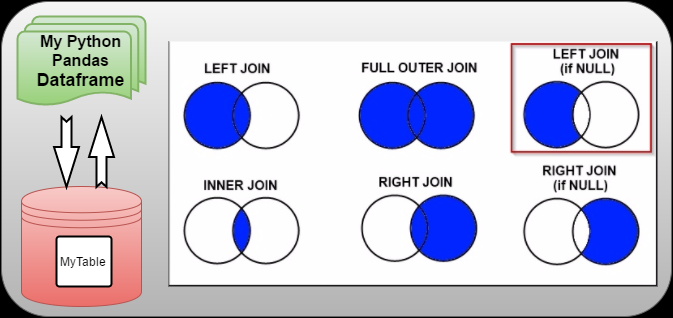

In [179]:
Mylist1 = [(1,10),(2,20),(3,30),(4,40),(5,50)]
labels1 = ['ID','NUM']
df1_x = pd.DataFrame.from_records(Mylist1,columns= labels1)
df1_x
Mylist2 = [(1,'A'),(6,'B'),(3,'C'),(8,'D'),(10,'E')]
labels2 = ['ID','ALPHA']
df2_x = pd.DataFrame.from_records(Mylist2,columns= labels2)
print(df1_x)
print(df2_x)

df_onlyleft = pd.merge(left=df1_x,right=df2_x,on='ID',how='left',indicator= True).query('_merge=="left_only"').drop('_merge',1)
df_onlyleft



   ID  NUM
0   1   10
1   2   20
2   3   30
3   4   40
4   5   50
   ID ALPHA
0   1     A
1   6     B
2   3     C
3   8     D
4  10     E


,ID,NUM,ALPHA
1,2,20,NaN
3,4,40,NaN
4,5,50,NaN


In [180]:
df_left = df1_x
df_right = df2_x
df_onlyleft2 = df_left.query('ID not in @df_right.ID')
df_onlyleft2

,ID,NUM
1,2,20
3,4,40
4,5,50


### Appending a row on a DataFrame
Append is used to add rows on a DataFrame.<br>

In [181]:
df3 = pd.DataFrame({'id':[10],                             # Lets modify our row to a DataFrame
                    'name':['z'], 
                    'sub':['sub10']})
df3

,id,name,sub
0,10,z,sub10


In [182]:
df1

,emp_id,emp_name,sub
0,1,a,sub1
1,2,b,sub2
2,3,c,sub3
3,4,d,sub4
4,5,e,sub5


In [183]:
df4 = df1
df5 = df3

df4 = df4.append(df5)  
df4

D:\Other_Stuffs\Software\Anaconda\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,emp_id,emp_name,id,name,sub
0,1.0,a,NaN,NaN,sub1
1,2.0,b,NaN,NaN,sub2
2,3.0,c,NaN,NaN,sub3
3,4.0,d,NaN,NaN,sub4
4,5.0,e,NaN,NaN,sub5
0,NaN,NaN,10.0,z,sub10


In [184]:
df4.reset_index(inplace=True)
#del df4['index']
df4

,index,emp_id,emp_name,id,name,sub
0,0,1.0,a,NaN,NaN,sub1
1,1,2.0,b,NaN,NaN,sub2
2,2,3.0,c,NaN,NaN,sub3
3,3,4.0,d,NaN,NaN,sub4
4,4,5.0,e,NaN,NaN,sub5
5,0,NaN,NaN,10.0,z,sub10


In [185]:
df1

,emp_id,emp_name,sub
0,1,a,sub1
1,2,b,sub2
2,3,c,sub3
3,4,d,sub4
4,5,e,sub5


You can observe the index has been modified. Lets correct our index

In [186]:
df4 = df1
df5 = df3
df4.append(df5, ignore_index = True) 

D:\Other_Stuffs\Software\Anaconda\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,emp_id,emp_name,id,name,sub
0,1.0,a,NaN,NaN,sub1
1,2.0,b,NaN,NaN,sub2
2,3.0,c,NaN,NaN,sub3
3,4.0,d,NaN,NaN,sub4
4,5.0,e,NaN,NaN,sub5
5,NaN,NaN,10.0,z,sub10


**These functions are useful when we want to create a DataFrame by combining 2 datasets **

__Takeaways__<br>
We learned how to _concatenate, merge and append_ dataframes using corresponding functions.

<a id=section209></a>

### 2.3.6. Conditionals in DataFrame
- This is used to perform **comparisions** on the records of DataFrame.<br>
- The output of comparision is of **boolean** datatype.<br>
- You can use this boolean to filter out records from the DataFrame.


In [187]:
market_df

,Address,City,State,Country,Name,Employees
ID,,,,,,
1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
3,332 Hill St,San Francisco,California 94114,USA,Super River,25
4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12
6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


In [188]:
market_df['Employees'] >=15                                                       # This returns a Boolean Series

ID
1    False
2     True
3     True
4    False
5    False
6     True
Name: Employees, dtype: bool

In [189]:
market_df[~(market_df['Employees'] >=15)]                                            # This returns all the rows for which the condition is True

,Address,City,State,Country,Name,Employees
ID,,,,,,
1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12


In [190]:
(market_df['Employees'] >=15)

ID
1    False
2     True
3     True
4    False
5    False
6     True
Name: Employees, dtype: bool

In [191]:
(market_df['State'] != 'CA 94119')

ID
1     True
2    False
3     True
4     True
5     True
6     True
Name: State, dtype: bool

In [192]:
market_df[(market_df['Employees'] >=15) & (market_df['State'] != 'CA 94119')]

,Address,City,State,Country,Name,Employees
ID,,,,,,
3,332 Hill St,San Francisco,California 94114,USA,Super River,25
6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


In [193]:
market_df[(market_df['Employees'] >=15) & (market_df['State'] != 'CA 94119')]     # It will return rows where both the conditions are satisfied.

,Address,City,State,Country,Name,Employees
ID,,,,,,
3,332 Hill St,San Francisco,California 94114,USA,Super River,25
6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20


__Takeaways__<br>
As you have seen conditional operators helps us in accessing _selective rows_ of the dataframe as per the condition's criteria. <br>They also helps us to get a clear picture of data by logically operating on combinations of various features, therefore these functions are widely used in **Feature Engineering**.<br>

<a id=section210></a>

### 2.3.7. Multi Index DataFrame

Until now you have seen DataFrames with a single index. Lets see how we can use more than 1 index to gain better insights.

In [194]:
import pandas as pd

company_df = {
    'Company':['Google','Google','Google','Microsoft','Microsoft','Microsoft'],
    'Year' : [2008,2009,2010,2008,2009,2010],
    'Revenue' : [11,15,16,9,12,14],
    'Employee' : [300,400,500,350,450,550]
}
cmp_df = pd.DataFrame(company_df)
cmp_df.set_index(['Company','Year'],inplace=True)

In [195]:
#Company=['Google','Google','Google','Microsoft','Microsoft','Microsoft']
#Year = [2008,2009,2010,2008,2009,2010]
#Revenue = [11,15,16,9,12,14]
#Employee = [300,400,500,350,450,550]

#list(zip(Revenue, Employee))                                                        # Zip will collect one value from each of its container(Revenue, Employee)

#list(zip(Company, Year))

#hier_index = list(zip(Company, Year))                                               # These pair values will be our 2 indices
#hier_index

#hier_index = pd.MultiIndex.from_tuples(hier_index)
#hier_index

#multi_index_df = pd.DataFrame(data = list(zip(Revenue, Employee)), index = hier_index, columns=['Revenue','Employee'])
#multi_index_df

#multi_index_df.index.names =['Company','Year']                                      # Rename our indices to Company and Year
#multi_index_df 

#multi_index_df.loc['Google']                                                        # Accessing data using our first index
#multi_index_df.loc['Google'].loc[2009]                                              # Accessing data using first index and then second index
#multi_index_df.loc[2009]                                              # Error Accessing data using first index and then second index

#multi_index_df.xs('Microsoft', level='Company')                                     # Accessing data based on Index level (either from first or second index)
#multi_index_df.xs(2008, level='Year')
#multi_index_df.xs(2009, level='Year')                                               # Accessing data based on Index level (either from first or second index)
#multi_index_df.xs(2010, level='Year')                                               # Accessing data based on Index level

In [196]:
cmp_df.loc['Google']                                                        # Accessing data using our first index

,Revenue,Employee
Year,,
2008,11,300
2009,15,400
2010,16,500


In [197]:
cmp_df.loc['Google'].loc[2009]                                              # Accessing data using first index and then second index

Revenue      15
Employee    400
Name: 2009, dtype: int64

In [198]:
cmp_df.loc[2009]                                              # Error Accessing data using first index and then second index

KeyError: 'the label [2009] is not in the [index]'

In [199]:
cmp_df.xs('Microsoft', level='Company')                                     # Accessing data based on Index level (either from first or second index)

,Revenue,Employee
Year,,
2008,9,350
2009,12,450
2010,14,550


In [200]:
cmp_df.xs(2009, level='Year')                                    # Accessing data based on Index level (either from first or second index)

,Revenue,Employee
Company,,
Google,15,400
Microsoft,12,450


In [201]:
cmp_df.xs(2010, level='Year')                                               # Accessing data based on Index level

,Revenue,Employee
Company,,
Google,16,500
Microsoft,14,550


Lets observe Multi level DataFrame in another dataset

In [202]:
import seaborn as sns                                                               # Import seaborn library for dataset
import pandas as pd
tips = sns.load_dataset('tips')
tips.head()                                                                         # head() shows the top 5 records of the dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [203]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [204]:
tips.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

In [205]:
tips[(tips.time =='Lunch')]['tip'].sum()

185.51000000000002

In [206]:
tips.shape

(244, 7)

In [207]:
tips.groupby(['time','sex','day'])['tip'].agg(['sum','mean','count'])

sum      mean  count
time   sex    day                          
Lunch  Male   Thur   89.41  2.980333     30
              Fri     5.70  1.900000      3
       Female Thur   79.42  2.561935     31
              Fri    10.98  2.745000      4
Dinner Male   Fri    21.23  3.032857      7
              Sat   181.95  3.083898     59
              Sun   186.78  3.220345     58
       Female Thur    3.00  3.000000      1
              Fri    14.05  2.810000      5
              Sat    78.45  2.801786     28
              Sun    60.61  3.367222     18

In [208]:
tips.shape

(244, 7)

In [209]:
tips.index                                                                         # This dataset has a numeric index having range between 0 and 244

RangeIndex(start=0, stop=244, step=1)

In [210]:
tip = tips.head(10)                                                                # Lets create a smaller dataset from the first 10 rows
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [211]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [212]:
tip.set_index(['sex'])                                                             # Usually you can create an Index using a categorical variable

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,16.99,1.01,No,Sun,Dinner,2
Male,10.34,1.66,No,Sun,Dinner,3
Male,21.01,3.50,No,Sun,Dinner,3
Male,23.68,3.31,No,Sun,Dinner,2
Female,24.59,3.61,No,Sun,Dinner,4
Male,25.29,4.71,No,Sun,Dinner,4
Male,8.77,2.00,No,Sun,Dinner,2
Male,26.88,3.12,No,Sun,Dinner,4
Male,15.04,1.96,No,Sun,Dinner,2


In [213]:
multi_index_tips = tip.set_index(['sex','size'])                                   # Lets set 'sex' and 'size' as our index
multi_index_tips

total_bill   tip smoker  day    time
sex    size                                      
Female 2          16.99  1.01     No  Sun  Dinner
Male   3          10.34  1.66     No  Sun  Dinner
       3          21.01  3.50     No  Sun  Dinner
       2          23.68  3.31     No  Sun  Dinner
Female 4          24.59  3.61     No  Sun  Dinner
Male   4          25.29  4.71     No  Sun  Dinner
       2           8.77  2.00     No  Sun  Dinner
       4          26.88  3.12     No  Sun  Dinner
       2          15.04  1.96     No  Sun  Dinner
       2          14.78  3.23     No  Sun  Dinner

In [214]:
multi_index_tips.sort_index(inplace = True)                                        # Sorting all the index of serving size in ascending order
multi_index_tips

total_bill   tip smoker  day    time
sex    size                                      
Male   2          23.68  3.31     No  Sun  Dinner
       2           8.77  2.00     No  Sun  Dinner
       2          15.04  1.96     No  Sun  Dinner
       2          14.78  3.23     No  Sun  Dinner
       3          10.34  1.66     No  Sun  Dinner
       3          21.01  3.50     No  Sun  Dinner
       4          25.29  4.71     No  Sun  Dinner
       4          26.88  3.12     No  Sun  Dinner
Female 2          16.99  1.01     No  Sun  Dinner
       4          24.59  3.61     No  Sun  Dinner

In [215]:
multi_index_tips.loc['Male']                                                       # Accessing records if index is Male

,total_bill,tip,smoker,day,time
size,,,,,
2,23.68,3.31,No,Sun,Dinner
2,8.77,2.00,No,Sun,Dinner
2,15.04,1.96,No,Sun,Dinner
2,14.78,3.23,No,Sun,Dinner
3,10.34,1.66,No,Sun,Dinner
3,21.01,3.50,No,Sun,Dinner
4,25.29,4.71,No,Sun,Dinner
4,26.88,3.12,No,Sun,Dinner


In [216]:
multi_index_tips.xs(2, level='size')                                               # Accessing records if serving size is 2 (From second index)

,total_bill,tip,smoker,day,time
sex,,,,,
Male,23.68,3.31,No,Sun,Dinner
Male,8.77,2.00,No,Sun,Dinner
Male,15.04,1.96,No,Sun,Dinner
Male,14.78,3.23,No,Sun,Dinner
Female,16.99,1.01,No,Sun,Dinner


__Takeaways__<br>
When dealing with multiple indices we have seen how to access data using __loc and xs__ function. Also we have seen _creating index_ using _categorical variable_.

<a id=section211></a>

### 2.3.8. Groupby

Groupby allows you to group together _rows_ based on a _column_ and perform an aggregate function on them.<br/>
This is quiet a handy tool if you don't want to change the index of the DataFrame.

In [217]:
tips.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

In [218]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [219]:
byTime = tips.groupby('time')                                                    # Lets analyse the metrics bases on time of meal(Lunch, Dinner)

In [220]:
byTime

In [221]:
byTime.count()                                                                   # Number of meals for Lunch and Dinner

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Lunch,68,68,68,68,68,68
Dinner,176,176,176,176,176,176


We can evaluate the average bill, tip and serving size at Lunch and Dinner

In [222]:
byTime.mean()                                                                    # Average bill

,total_bill,tip,size
time,,,
Lunch,17.168676,2.728088,2.411765
Dinner,20.797159,3.102670,2.630682


In [223]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


We can evaluate the total bill, tip and serving size at Lunch and Dinner

In [224]:
byTime.sum()                                                                     # Total bill

,total_bill,tip,size
time,,,
Lunch,1167.47,185.51,164
Dinner,3660.30,546.07,463


In [225]:
tips.groupby('time').sum()

,total_bill,tip,size
time,,,
Lunch,1167.47,185.51,164
Dinner,3660.30,546.07,463


Take a quick look at the below image to get a clear picture of _groupby_ function.
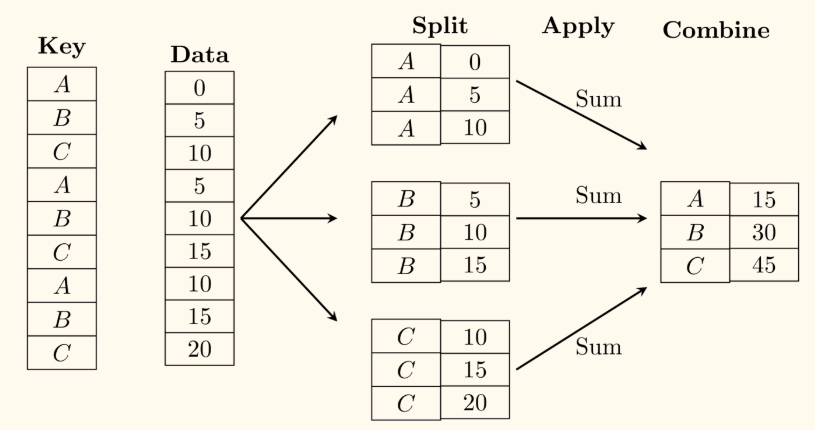

__Takeaways__<br>
As we have seen in above examples, we can use __groupby__ method to club together rows as per a column, then we can use it to calculate _average_ and _sum_ of various features.

<a id=section213></a>

### 2.3.9. Operations on a DataFrame
Here are some basic operations you can perform on a DataFrame

In [226]:
tips.head()                                                                     # Observe the first 5 elements of the dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [227]:
tips['size'].unique()                                                           # Observe the unique values of tips['size']

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [228]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [229]:
tips['size'].nunique()                                                          # Observe the number of unique values of tips['size']

6

In [230]:
tips['time'].value_counts()                                                     # Observe the number of counts of tips['size']

Dinner    176
Lunch      68
Name: time, dtype: int64

### Applying a function on DataFrame
We can apply any function on the elements of a dataframe

In [231]:
people = [['Rick',60, 'O+'], ['Morty', 10, 'O+'], ['Summer', 45,'A-'], ['Beth',18,'B+']]
people_df = pd.DataFrame(people, columns=['Name','Score', 'Blood Group'])
people_df

,Name,Score,Blood Group
0,Rick,60,O+
1,Morty,10,O+
2,Summer,45,A-
3,Beth,18,B+


In [232]:
people_df['Score']*2

0    120
1     20
2     90
3     36
Name: Score, dtype: int64

In [233]:
def times2(x):                                                                # We are going to apply this function
    num = x
    if x%6==0:
        num *= 2
    return num

In [234]:
people_df['Score']

0    60
1    10
2    45
3    18
Name: Score, dtype: int64

In [235]:
people_df['Score'].apply(times2)                                              # Applying times2() function on a column of dataframe

0    120
1     10
2     45
3     36
Name: Score, dtype: int64

In [236]:
people_df['Score'].apply(lambda x: x * 2)                                     # Applying lambda function on a column of dataframe

0    120
1     20
2     90
3     36
Name: Score, dtype: int64

In [237]:
people_df.sort_values('Score')                                                # Sorting the records based on a column

,Name,Score,Blood Group
1,Morty,10,O+
3,Beth,18,B+
2,Summer,45,A-
0,Rick,60,O+


__Takeaways__<br>
In this manner we can perform any operation on the _column_ of a dataframe. <br>
These functions are widely used in **Feature Engineering**

<a id=section214></a>

### 2.4. Time Series in Pandas
Here we will explore the __DateTime__ functions provided by Pandas and how efficient it is to analyse Time Series data.<br/>
Shown below is a time series data of the pollution in South Africa.
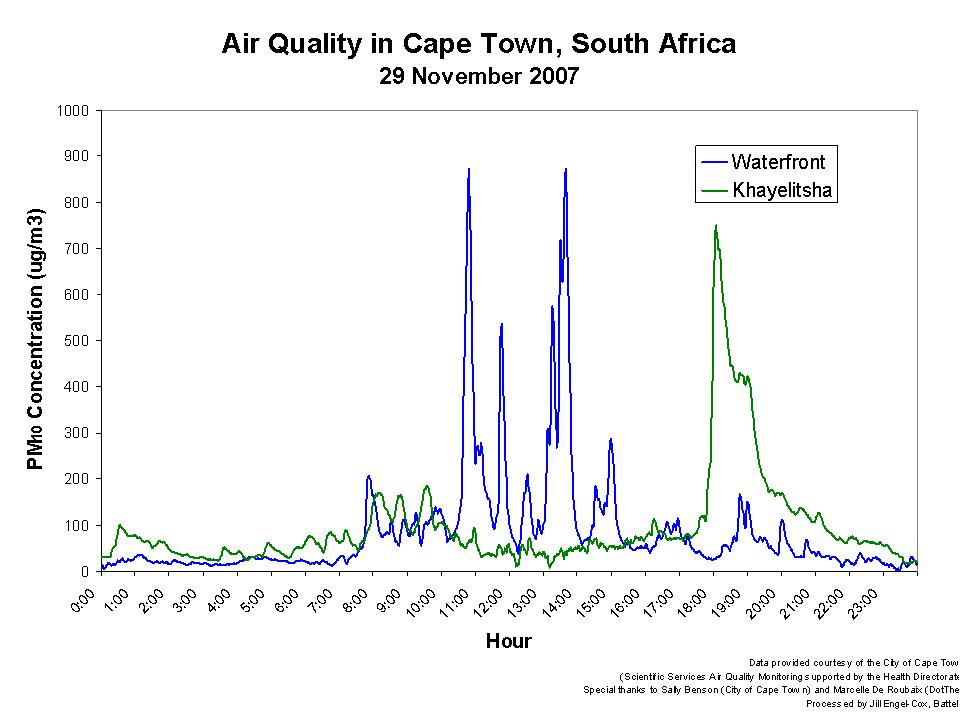

In [238]:
import pandas as pd
air_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/AirQualityUCI.csv')                                      # Import the Dataset

In [239]:
air_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [240]:
type(air_df['CO(GT)'])

pandas.core.series.Series

In [241]:
air_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [242]:
air_df[air_df['NMHC(GT)']==-200]['NMHC(GT)'].count()

8443

Almost 90% of the elements of NMHC(GT) is -200.0. Therefore dropping this column.

In [243]:
air_df.drop(['NMHC(GT)'], axis=1)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
7,3/11/2004,1:00:00,1.0,1136,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
8,3/11/2004,2:00:00,0.9,1094,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648
9,3/11/2004,3:00:00,0.6,1010,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517


In [244]:
#air_df.head()                                                                  # Observe the columns and rows of the dataset

Info of dataset provides column data type and the number of values 

In [245]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null int64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null int64
NOx(GT)          9357 non-null int64
PT08.S3(NOx)     9357 non-null int64
NO2(GT)          9357 non-null int64
PT08.S4(NO2)     9357 non-null int64
PT08.S5(O3)      9357 non-null int64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


__Date and Time__ columns are _objects datatype_. We need to convert them to __datetime__ format.<br>
Convert the Date to datetime object. Format is used to specify MM/DD/YY

In [246]:
air_df.head(1)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578


In [247]:
air_df['Date'] = pd.to_datetime(air_df['Date'], format='%m/%d/%Y')     

In [248]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null int64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null int64
NOx(GT)          9357 non-null int64
PT08.S3(NOx)     9357 non-null int64
NO2(GT)          9357 non-null int64
PT08.S4(NO2)     9357 non-null int64
PT08.S5(O3)      9357 non-null int64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(8), object(1)
memory usage: 1.1+ MB


Checking the __unique values__ in air_df[ 'Time' ] and their count.

In [249]:
air_df['Time'].unique()     

array(['18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00',
       '23:00:00', '0:00:00', '1:00:00', '2:00:00', '3:00:00', '4:00:00',
       '5:00:00', '6:00:00', '7:00:00', '8:00:00', '9:00:00', '10:00:00',
       '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00',
       '16:00:00', '17:00:00'], dtype=object)

In [250]:
air_df.Time.unique()

array(['18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00',
       '23:00:00', '0:00:00', '1:00:00', '2:00:00', '3:00:00', '4:00:00',
       '5:00:00', '6:00:00', '7:00:00', '8:00:00', '9:00:00', '10:00:00',
       '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00',
       '16:00:00', '17:00:00'], dtype=object)

Converting __time__ to pandas __datetime__ with format HH/MM/SS

In [251]:
air_df['Time'] = pd.to_datetime(air_df['Time'], format = '%H:%M:%S')     

In [252]:
air_df.dtypes                                         # Final check for our date and time column

Date             datetime64[ns]
Time             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)               int64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)             int64
NOx(GT)                   int64
PT08.S3(NOx)              int64
NO2(GT)                   int64
PT08.S4(NO2)              int64
PT08.S5(O3)               int64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [253]:
year = air_df.Date.dt.year                            # Extracting Year from Date column
print(year.head())

0    2004
1    2004
2    2004
3    2004
4    2004
Name: Date, dtype: int64


In [254]:
month = air_df.Date.dt.month                          # Extracting Month from Date column
print(month.head())

0    3
1    3
2    3
3    3
4    3
Name: Date, dtype: int64


In [255]:
month.nunique()                                       # Counting the number of months

12

In [256]:
day = air_df.Date.dt.day                              # Extracting Day from Date column
print(day.head())    

0    10
1    10
2    10
3    10
4    10
Name: Date, dtype: int64


In [257]:
day.nunique()                                         # Counting the number of days

31

In [258]:
week = air_df.Date.dt.week                            # Extracting week number from Date column
print(week.head())

0    11
1    11
2    11
3    11
4    11
Name: Date, dtype: int64


The __index of week days__ are provided below.<br>
0 = Monday<br>1 = Tuesday<br>2 = Wednesday<br>3 = Thursday<br>4 = Friday<br>5 = Saturday<br>6 = Sunday

In [259]:
day_of_week = air_df.Date.dt.dayofweek                 # Extracting the day of the week number
print(day_of_week.head())

0    2
1    2
2    2
3    2
4    2
Name: Date, dtype: int64


In [260]:
day_name = air_df.Date.dt.weekday_name                 # Extracting the name of the day
print(day_name.head())

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: Date, dtype: object


In [261]:
day_of_year = air_df.Date.dt.dayofyear                 # Extracting the day of the year
print(day_of_year.head())

0    70
1    70
2    70
3    70
4    70
Name: Date, dtype: int64


In [262]:
hour = air_df.Time.dt.hour                             # Extracting the hour from time
print(hour.head())

0    18
1    19
2    20
3    21
4    22
Name: Time, dtype: int64


In [263]:
hour.nunique()                                         # Counting the number of hours

24

In [264]:
minute = air_df.Time.dt.minute                         # Extracting the minutes from the time
print(minute.head())

0    0
1    0
2    0
3    0
4    0
Name: Time, dtype: int64


In [265]:
second = air_df.Time.dt.second                         # Extracting the seconds from the time
print(second.head())

0    0
1    0
2    0
3    0
4    0
Name: Time, dtype: int64


Performing Conditional operations on Time. <br>
Lets measure the number of records before 9 a.m.

In [266]:
timestamp = pd.to_datetime("09:00:00", format='%H:%M:%S')   
air_df[air_df['Time'] < timestamp].shape

(3510, 15)

There are 3510 records where time is before 9 am

Performing Conditional operations on Date. <br>
Lets measure the number of records before 01/01/2005

In [267]:
datestamp = pd.to_datetime("01/01/2005", format='%d/%m/%Y')

In [268]:
from datetime import timedelta
#datestamp + timedelta(days=1)
#datestamp + timedelta(days=-1)


In [269]:
air_df[air_df['Date'] < datestamp].tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
7105,2004-12-31,1900-01-01 19:00:00,-200.0,930,-200,5.3,781,-200,933,-200,906,866,9.3,33.6,0.3958
7106,2004-12-31,1900-01-01 20:00:00,-200.0,962,-200,5.3,780,-200,919,-200,909,884,9.6,32.3,0.3871
7107,2004-12-31,1900-01-01 21:00:00,-200.0,974,-200,5.5,790,-200,915,-200,895,951,9.1,32.5,0.3766
7108,2004-12-31,1900-01-01 22:00:00,-200.0,1055,-200,5.6,791,-200,845,-200,936,1195,9.1,37.2,0.4310
7109,2004-12-31,1900-01-01 23:00:00,-200.0,1003,-200,4.6,744,-200,882,-200,899,1138,7.8,38.4,0.4085


There are 7109 records before jan 1 2005

__Takeaways__<br>
- We have seen that by using __datetime format__ we can extract information like __year, month, hour, minute__ etc from time.
- We can even retrieve name of the day and day of the year type information.
- All these things help to better understand our data which in turn help in drawing important conclusions and insights.

__Conclusion__<br/>
Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages.<br/>
- __Pandas__ is one of those packages, and makes importing and analyzing data much easier.
- It is an __open-source__, BSD-licensed Python library providing __high-performance__, __easy-to-use data structures__ and data analysis tools for the Python programming language. 
- Python with Pandas is used in a wide range of fields including _academic and commercial domains_ like __finance, economics,         statistics, analytics__, etc.
- They are built on packages like __NumPy and matplotlib__ to give you a single, convenient, place to do most of your data analysis and visualization work.

__Key Features__<br/>
- __Fast and efficient DataFrame object__ with default and customized indexing.
- Tools for loading data into in-memory data objects from different file formats.
- Data alignment and integrated handling of __missing data__.
- __Reshaping and pivoting__ of date sets.
- __Label-based slicing__, __indexing and subsetting__ of large data sets.
- Columns from a data structure can be _deleted or inserted_.
- __Groupby__ data for aggregation and transformations.
- High performance __merging and joining__ of data.
- __Time Series__ functionality.

In [270]:
import pandas as pd
myList1 = [['M00000032+5737103','4264',    '0.000000',    '0.000000','N7789','10.905','10.635'],
    ['2M00000068+5710233',  '4264', '8.000000',    '-18.000000', 'N7789','10.664','10.132'],
    ['2M00000222+5625359',  '4264','0.000000',    '0.000000','N7789','11.982','11.433'],
    ['2M00000818+5634264',  '4264','0.000000',    '0.000000','N7789','12.501','11.892'],
    ['2M00001242+5524391',  '4264','0.000000',    '-4.000000','N7789','12.091','11.482']]
df1_st = pd.DataFrame(myList1,columns=['Star_ID','Loc_ID','pmRA','pmDE','Field','Jmag','Hmag']) 

print(df1_st)
myList2 = [['M00000032+5737103','4264',    '0.000000',    '0.000000','N7789','10.905','10.635'],
    ['2M00000068+5710233',  '4264', '8.000000',    '-18.000000', 'N7789','10.664','10.132'],
    ['2M00001242+5524391',  '4264','0.000000',    '-4.000000','N7789','12.091','11.482']]
df2_st = pd.DataFrame(myList2,columns=['Star_ID','Loc_ID','pmRA','pmDE','Field','Jmag','Hmag'])

print(df2_st)
df3_st = pd.merge(df1_st,df2_st,on='Star_ID')
print(df3_st)
df1_st = df1_st[~df1_st.Star_ID.isin(df3_st.Star_ID)]


              Star_ID Loc_ID      pmRA        pmDE  Field    Jmag    Hmag
0   M00000032+5737103   4264  0.000000    0.000000  N7789  10.905  10.635
1  2M00000068+5710233   4264  8.000000  -18.000000  N7789  10.664  10.132
2  2M00000222+5625359   4264  0.000000    0.000000  N7789  11.982  11.433
3  2M00000818+5634264   4264  0.000000    0.000000  N7789  12.501  11.892
4  2M00001242+5524391   4264  0.000000   -4.000000  N7789  12.091  11.482
              Star_ID Loc_ID      pmRA        pmDE  Field    Jmag    Hmag
0   M00000032+5737103   4264  0.000000    0.000000  N7789  10.905  10.635
1  2M00000068+5710233   4264  8.000000  -18.000000  N7789  10.664  10.132
2  2M00001242+5524391   4264  0.000000   -4.000000  N7789  12.091  11.482
              Star_ID Loc_ID_x    pmRA_x      pmDE_x Field_x  Jmag_x  Hmag_x  \
0   M00000032+5737103     4264  0.000000    0.000000   N7789  10.905  10.635   
1  2M00000068+5710233     4264  8.000000  -18.000000   N7789  10.664  10.132   
2  2M00001242+552439

In [271]:
df1_st

,Star_ID,Loc_ID,pmRA,pmDE,Field,Jmag,Hmag
2,2M00000222+5625359,4264,0.000000,0.000000,N7789,11.982,11.433
3,2M00000818+5634264,4264,0.000000,0.000000,N7789,12.501,11.892


### The End